## COPRA## 

In [153]:
import numpy as np
import random
random.seed = 108
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
%matplotlib inline

In [154]:
params={}
params["-v"] = list(range(1,10))
# params["-cp"] = np.arange(0.05, 0.95, 0.05)
# params["-seed"] = random.sample(range(1, 100), 10)

In [155]:
params

{'-v': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [156]:
def generate_params(params):
    keys = list(params.keys())
    if len(keys) == 1:
        for value in params[keys[0]]:
            yield ( keys[0] + " " + str(value) )        
    if len( keys ) > 1:
        for value in params[keys[0]]:
            for remain_params in generate_params({k:params[k] for k in keys[1:]}):
                yield ( keys[0] + " " + str(value) + " " + remain_params )

In [161]:
def copra_experiment(inputFile, groundTruth, params = {}, vertexNumerationShift=0, verbose=False):
    datasetName = inputFile.split('/')[-2]
    outputDir = "../Results/COPRA_{}".format(datasetName)
    outputFile = outputDir + "/" + "clusters-" + inputFile.split('/')[-1]
    print("Output dir name: {}".format(outputDir) )
    print("Output file name: {}".format(outputFile) )
    
    !mkdir {outputDir}
    
    all_results = {}
    bestParam = "not found"
    nmi_best = 0;
    for param in tqdm(list(generate_params(params))):
        tmp=!(cd {outputDir} && java -cp ../../related_methods/OSLOM2/copra.jar COPRA ../{inputFile} {param} -repeat 100 -mo -nosplit)
    #     !sed -i '' '/^#/d' {outputFile}
        with open(outputFile) as f:
            lines = f.readlines()    
        with open(outputFile, 'w') as the_file:
            for line in lines:
                the_file.write(" ".join([str(int(a) + vertexNumerationShift) for a in line.split()]) + "\n")
        output=!../Overlapping-NMI/onmi {groundTruth} {outputFile}
        if verbose:
            print(output)
        nmi=float(output[0].split()[1])
        all_results[param] = nmi
        if nmi >  nmi_best:
            bestParam = param
            nmi_best = nmi

    print("Best ONMI: {} params: '{}'".format(nmi_best, bestParam) )                   
    return all_results

In [162]:
def plot_graph_for_all_results(all_results, datasetName):
    xdata=[]
    ydata=[]
    df = pd.DataFrame()
    for param, nmi in all_results.items():
        splited = param.split()
        xdata.append(float(splited[1]))
        ydata.append(nmi)
        df = df.append({'x': float(splited[1]), 'y': nmi}, ignore_index=True)

    plt.plot(xdata, ydata, 'C3', zorder=1, lw=3)
    # ax = plt.axes(projection='3d')
    plt.scatter(xdata, ydata,s=70,zorder=2)
    plt.xlabel('v parameter')
    plt.ylabel('nmi value');
    plt.title('onmi values for dataset: {}\nAlgorithm: "COPRA" no option "extrasimplify"'.format(datasetName));
    plt.show()

# School Friendship #

In [163]:
inputFile = "../datasets/school_friendship/school-2.dat"
groundTruth = "../datasets/school_friendship/truth-school.dat"
all_results = copra_experiment(inputFile, groundTruth, params, vertexNumerationShift=-1)

Output dir name: ../Results/COPRA_school_friendship
Output file name: ../Results/COPRA_school_friendship/clusters-school-2.dat



Best ONMI: 0.64575 params: '-v 1'


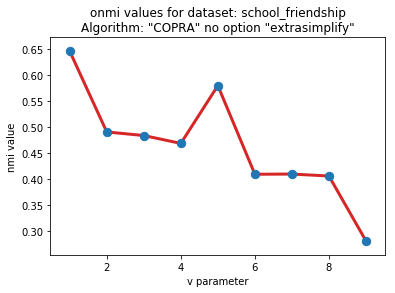

In [164]:
plot_graph_for_all_results(all_results, "school_friendship")

# Karate Club #

In [165]:
inputFile = "../datasets/karate/karate.dat"
groundTruth = "../datasets/karate/truth_karate.dat"
all_results = copra_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

Output dir name: ../Results/COPRA_karate
Output file name: ../Results/COPRA_karate/clusters-karate.dat
mkdir: cannot create directory ‘../Results/COPRA_karate’: File exists



Best ONMI: 0.642494 params: '-v 5'


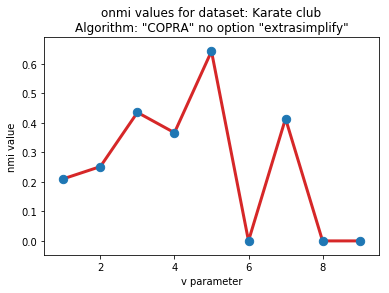

In [166]:
plot_graph_for_all_results(all_results, "Karate club")

# Adj noun#

In [167]:
inputFile = "../datasets/adjnoun/adjnoun.dat"
groundTruth = "../datasets/adjnoun/truth_adjnoun.dat"
all_results = copra_experiment(inputFile, groundTruth, params, vertexNumerationShift=-1)

Output dir name: ../Results/COPRA_adjnoun
Output file name: ../Results/COPRA_adjnoun/clusters-adjnoun.dat
mkdir: cannot create directory ‘../Results/COPRA_adjnoun’: File exists



Best ONMI: 0.00463105 params: '-v 1'


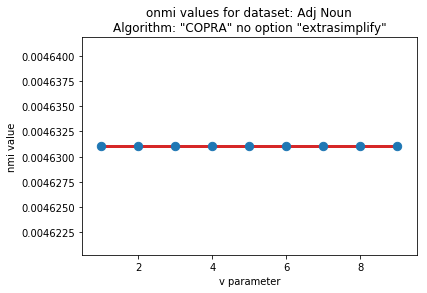

In [168]:
plot_graph_for_all_results(all_results, "Adj Noun")

# Football Club #

In [169]:
inputFile = "../datasets/football/footballTSEinput_original.dat"
groundTruth = "../datasets/football/truth_footballTSEinput.dat"
all_results = copra_experiment(inputFile, groundTruth, params, vertexNumerationShift=-1)

Output dir name: ../Results/COPRA_football
Output file name: ../Results/COPRA_football/clusters-footballTSEinput_original.dat
mkdir: cannot create directory ‘../Results/COPRA_football’: File exists



Best ONMI: 0.853344 params: '-v 2'


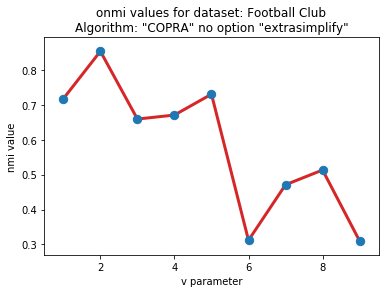

In [170]:
plot_graph_for_all_results(all_results, "Football Club")

# Politics Book #

In [171]:
inputFile = "../datasets/polbooks/polbooks.dat"
groundTruth = "../datasets/polbooks/truth_polbooks.dat"
all_results = copra_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

Output dir name: ../Results/COPRA_polbooks
Output file name: ../Results/COPRA_polbooks/clusters-polbooks.dat
mkdir: cannot create directory ‘../Results/COPRA_polbooks’: File exists



Best ONMI: 0.409727 params: '-v 2'


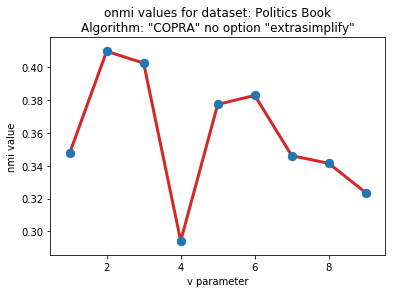

In [172]:
plot_graph_for_all_results(all_results, "Politics Book")